# Auto-Stop-Train 自动终止训练
训练次数并不是越多越好, 过多会导致 **过拟合(Overfitting)**。神经元网络也许可以记住所有的图片,但是对于识别分类新的图片反而可能会变差。

当测试Loss 和 训练Loss 出现分叉时, 说明发生了 过拟合。
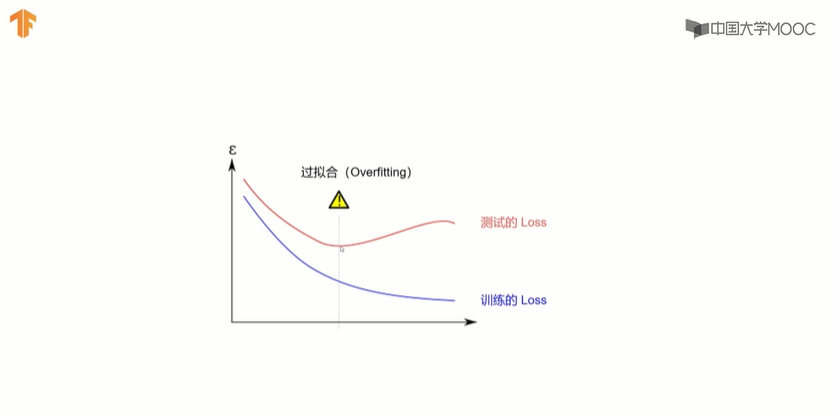

`tf.keras` 提供了`Callback`  来根据某些条件来终止训练。
可在 https://tensorflow.google.cn/api_docs/python/tf/keras/callbacks/Callback?hl=en 里查阅`keras`的`API`。

In [11]:
import tensorflow as tf
from tensorflow import keras

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.2):
            print("\n Loss is low enough, so stop training!")
            self.model.stop_training = True
        else:
            print("\n Loss is high, can train agin")
            self.model.stop_training = False

my_cb = myCallback()
# load image datas used for training
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# scale train data to improve effects of training, test_images_scaled because of train_images scaled
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

# 建立神经元网络模型
#输入层:
#中间层:512个神经元, 并指定 激活函数为 relu()
#输出层:10个类别(神经元), 并指定激活函数为 softmax()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 指定优化函数 loss 并显示每次训练完成后的精度
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# start training
model.fit(train_images_scaled, train_labels, epochs=100, callbacks=[my_cb])


Train on 60000 samples
Epoch 1/100
59712/60000 [============================>.] - ETA: 0s - loss: 0.4760 - accuracy: 0.8281
 Loss is high, can train agin
60000/60000 [==============================] - 9s 147us/sample - loss: 0.4757 - accuracy: 0.8281
Epoch 2/100
59744/60000 [============================>.] - ETA: 0s - loss: 0.3600 - accuracy: 0.8686
 Loss is high, can train agin
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3598 - accuracy: 0.8686
Epoch 3/100
59680/60000 [============================>.] - ETA: 0s - loss: 0.3250 - accuracy: 0.8803
 Loss is high, can train agin
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3255 - accuracy: 0.8802
Epoch 4/100
59904/60000 [============================>.] - ETA: 0s - loss: 0.2986 - accuracy: 0.8892
 Loss is high, can train agin
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2986 - accuracy: 0.8892
Epoch 5/100
59904/60000 [============================>.] - ETA: 0

## Result
由上面的结果可知,每次训练结束,都会调用 `callback`, 并依据`callback`中的条件来决定是否要停止训练(通过设置`self.model.stop_training = True`)。
值得一提的是, 如果训练次数达到设置的次数之后, 条件还未满足, 训练当然也会停止哒!